<a href="https://colab.research.google.com/github/Akashkunwar/dscodes/blob/master/Covid_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## Retreving Data
# Assigning Github URLs
cases_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

# Reading URLs through Pandas liberary
total_cases = pd.read_csv(cases_url)
total_deaths = pd.read_csv(deaths_url)
total_recovered = pd.read_csv(recovered_url)


# #Extracting useful numerical colums
# total_cases_num = total_cases.iloc[:, 4:]
# total_deaths_num = total_deaths.iloc[:, 4:]
# total_recovered_num = total_recovered.iloc[:, 4:]

# #Converting and replacing dates into datetime format
# total_cases_num.columns = pd.to_datetime(total_cases_num.columns)
# total_deaths_num.columns = pd.to_datetime(total_deaths_num.columns)
# total_recovered_num.columns = pd.to_datetime(total_recovered_num.columns)
# # total_cases_num = total_cases_num.T.set_index(pd.to_datetime(total_cases_num.T.index, format = "%m/%d/%y")).T
# # total_deaths_num = total_deaths_num.T.set_index(pd.to_datetime(total_deaths_num.T.index, format = "%m/%d/%y")).T
# # total_recovered_num = total_recovered_num.T.set_index(pd.to_datetime(total_recovered_num.T.index, format = "%m/%d/%y")).T

# #Extracting country/region colums and renaming country/region into country
# total_cases_cat = pd.DataFrame(total_cases["Country/Region"]).rename(columns={'Country/Region': 'Country'})
# total_deaths_cat = pd.DataFrame(total_deaths["Country/Region"]).rename(columns={'Country/Region': 'Country'})
# total_recovered_cat = pd.DataFrame(total_recovered["Country/Region"]).rename(columns={'Country/Region': 'Country'})


## Cleaning Data
# Extreacting and storing column dates in dates
dates = total_cases.columns[4:]

# Reshaping total cases column from wide shape to df shape
total_cases_df = total_cases.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
# Reshaping total deaths column from wide shape to df shape
total_deaths_df = total_deaths.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
# Reshaping total recovered column from wide shape to df shape
total_recovered_df = total_recovered.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

# Merging total_cases_df and total_deaths_df
all_df = total_cases_df.merge(
  right=total_deaths_df, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
# Merging all_df and total_recovered_df
all_df = all_df.merge(
  right=total_recovered_df, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

# Converting Date to proper datetime format
all_df["Date"] = pd.to_datetime(all_df["Date"])

# Inserting converted date to full table
all_df = all_df.sort_values(['Country/Region', 'Date'])
#all_df = all_df.sort_values(['Country/Region', 'Date'], ascending=[True, True])
# Reseting Index
# all_df = all_df.reset_index()

# Adding New cases, New deaths, New recovered to covid_df
covid_df = all_df.copy()
covid_df["New cases"] = all_df.copy().groupby('Country/Region')['Confirmed'].diff().fillna(0)
covid_df["New deaths"] = all_df.copy().groupby('Country/Region')['Deaths'].diff().fillna(0)
covid_df["New recovered"] = all_df.copy().groupby('Country/Region')['Recovered'].diff().fillna(0)

# Converting float value to int in covid_df columns
covid_df["Recovered"] = covid_df["Recovered"].fillna(0)
covid_df["Recovered"] = covid_df["Recovered"].astype(int).fillna(0)
covid_df["New cases"] = covid_df["New cases"].astype(int)
covid_df["New deaths"] = covid_df["New deaths"].astype(int)
covid_df["New recovered"] = covid_df["New recovered"].astype(int)

# Reseting jumbled index in order
covid_df = covid_df.reset_index(drop=True)

# Arranging Columns
covid_df = covid_df[['Date', 'Province/State', 'Country/Region','Lat','Long',
 'Confirmed', 'Deaths','Recovered', 'New cases','New deaths','New recovered']]

# Renaming column names
covid_df = covid_df.rename(columns={'Country/Region': 'Country',
                                    'Province/State':'Province',
                                    'Confirmed': 'Total cases',
                                    'Deaths': 'Total deaths',
                                    'Recovered':'Total recovered'})

covid_df

,Date,Province,Country,Lat,Long,Total cases,Total deaths,Total recovered,New cases,New deaths,New recovered
0,2020-01-22,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0
1,2020-01-23,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0
2,2020-01-24,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0
3,2020-01-25,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0
4,2020-01-26,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
202155,2022-01-08,NaN,Zimbabwe,-19.015438,29.154857,221918,5148,0,636,12,0
202156,2022-01-09,NaN,Zimbabwe,-19.015438,29.154857,221918,5148,0,0,0,0
202157,2022-01-10,NaN,Zimbabwe,-19.015438,29.154857,223000,5180,0,1082,32,0
202158,2022-01-11,NaN,Zimbabwe,-19.015438,29.154857,223000,5180,0,0,0,0


In [14]:
covid_df[covid_df['Country']=="France"]

,Date,Province,Country,Lat,Long,Total cases,Total deaths,Total recovered,New cases,New deaths,New recovered
85918,2020-01-22,French Guiana,France,3.9339,-53.125800,0,0,0,0,0,0
85919,2020-01-22,French Polynesia,France,-17.6797,149.406800,0,0,0,0,0,0
85920,2020-01-22,Guadeloupe,France,16.2650,-61.551000,0,0,0,0,0,0
85921,2020-01-22,Martinique,France,14.6415,-61.024200,0,0,0,0,0,0
85922,2020-01-22,Mayotte,France,-12.8275,45.166244,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
94577,2022-01-12,Saint Barthelemy,France,17.9000,-62.833300,2390,6,0,-99826,-429,0
94578,2022-01-12,Saint Pierre and Miquelon,France,46.8852,-56.315900,316,0,0,-2074,-6,0
94579,2022-01-12,St Martin,France,18.0708,-63.050100,5351,59,0,5035,59,0
94580,2022-01-12,Wallis and Futuna,France,-14.2938,-178.116500,454,7,0,-4897,-52,0


In [12]:
covid_df.isna().sum()

Province/State     139346
Country/Region          0
Lat                  1444
Long                 1444
Date                    0
Confirmed               0
Deaths                  0
Recovered               0
Daily cases             0
Daily deaths            0
Daily recovered         0
dtype: int64

In [3]:
# total_cases.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,157431,157454,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,201402,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,211297,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806


In [4]:
# total_cases_num.head(3)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14,2021-12-15,2021-12-16,2021-12-17,2021-12-18,2021-12-19,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,157431,157454,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,201402,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,211297,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806


In [5]:
# result = total_cases_num.copy()
# result.insert(0,"Country",total_cases_cat)
# result.head(3)

,Country,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:00:00,2020-02-17 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-22 00:00:00,2020-02-23 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,...,2021-12-04 00:00:00,2021-12-05 00:00:00,2021-12-06 00:00:00,2021-12-07 00:00:00,2021-12-08 00:00:00,2021-12-09 00:00:00,2021-12-10 00:00:00,2021-12-11 00:00:00,2021-12-12 00:00:00,2021-12-13 00:00:00,2021-12-14 00:00:00,2021-12-15 00:00:00,2021-12-16 00:00:00,2021-12-17 00:00:00,2021-12-18 00:00:00,2021-12-19 00:00:00,2021-12-20 00:00:00,2021-12-21 00:00:00,2021-12-22 00:00:00,2021-12-23 00:00:00,2021-12-24 00:00:00,2021-12-25 00:00:00,2021-12-26 00:00:00,2021-12-27 00:00:00,2021-12-28 00:00:00,2021-12-29 00:00:00,2021-12-30 00:00:00,2021-12-31 00:00:00,2022-01-01 00:00:00,2022-01-02 00:00:00,2022-01-03 00:00:00,2022-01-04 00:00:00,2022-01-05 00:00:00,2022-01-06 00:00:00,2022-01-07 00:00:00,2022-01-08 00:00:00,2022-01-09 00:00:00,2022-01-10 00:00:00,2022-01-11 00:00:00,2022-01-12 00:00:00
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,...,157431,157454,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,201402,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,211297,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806


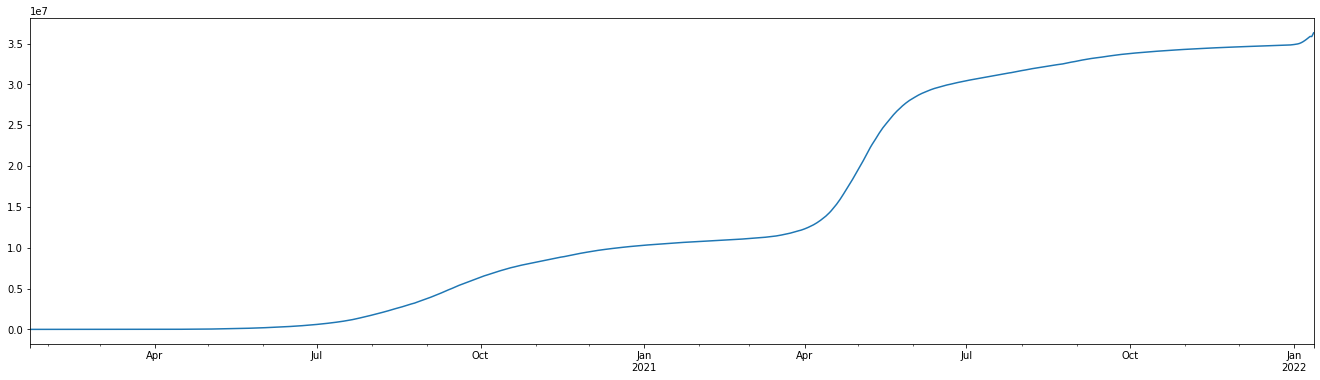

In [6]:
# total_cases[total_cases['Country/Region']=='India']
# plt.figure(figsize=(23,6))
# total_cases_num.iloc[total_cases[total_cases['Country/Region']=='India'].index[0]].plot()

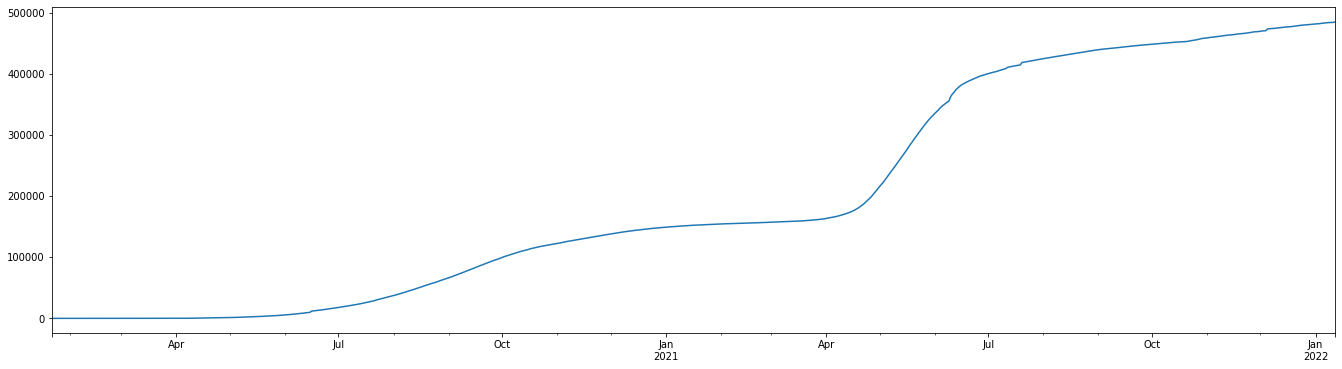

In [7]:
# total_deaths[total_deaths['Country/Region']=='India']
# plt.figure(figsize=(23,6))
# total_deaths_num.iloc[total_deaths[total_deaths['Country/Region']=='India'].index[0]].plot()

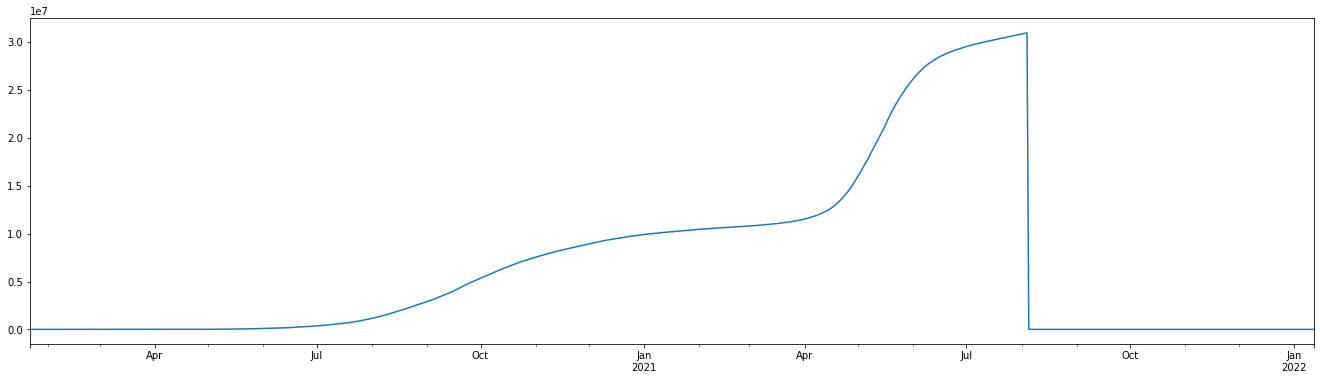

In [8]:
# total_recovered[total_recovered['Country/Region']=='India']
# plt.figure(figsize=(23,6))
# total_recovered_num.iloc[total_recovered[total_recovered['Country/Region']=='India'].index[0]].plot()

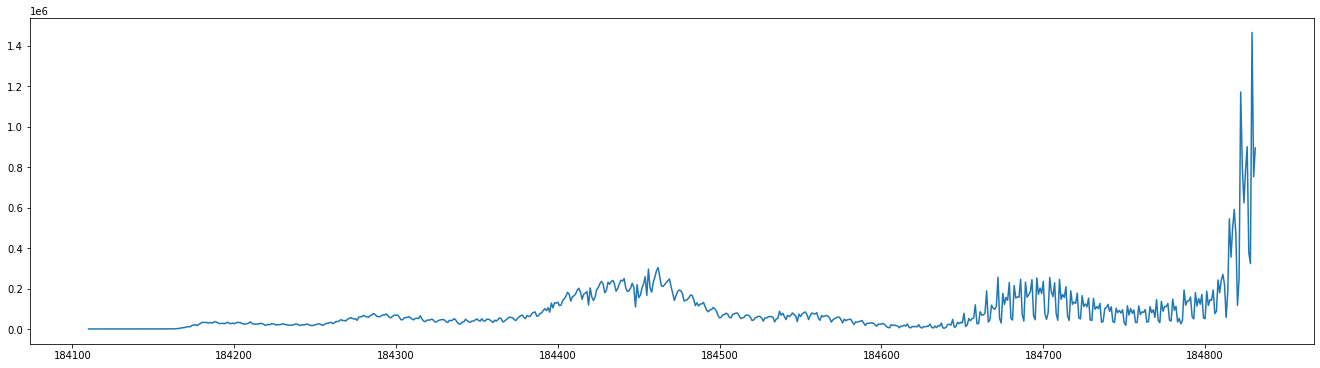

In [8]:
plt.figure(figsize=(23,6))
covid_df[covid_df["Country"]=="US"]['New cases'].plot()

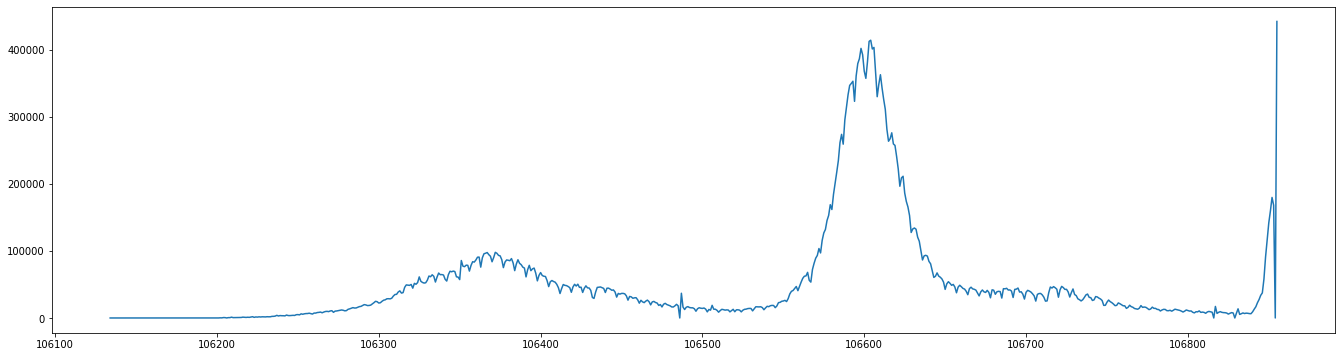

In [10]:
plt.figure(figsize=(23,6))
covid_df[covid_df["Country"]=="India"]["New cases"].plot()

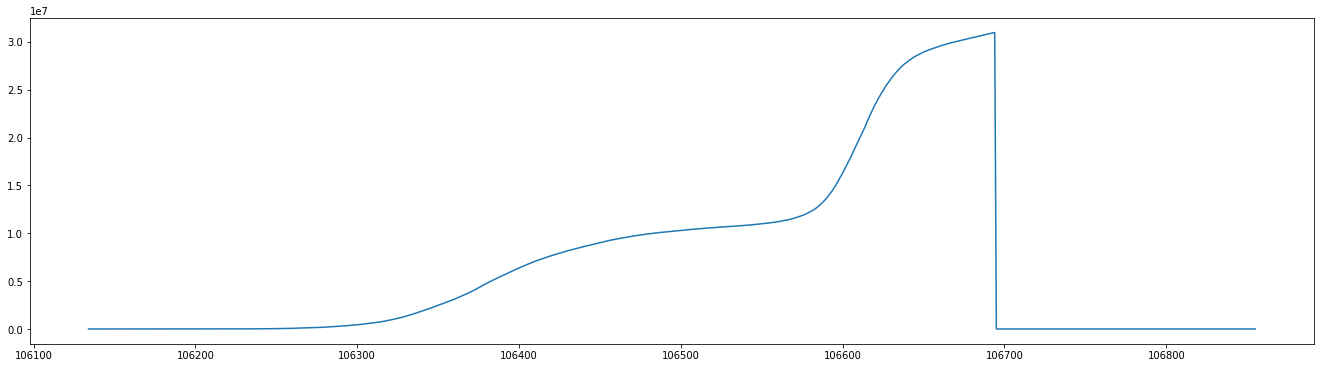

In [13]:
plt.figure(figsize=(23,6))
covid_df[covid_df["Country"]=="India"]["Total recovered"].plot()